In [2]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.datasets import mnist
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def train_mnist():
    # grab the MNIST dataset (if this is your first time using this
    # dataset then the 11MB download may take a minute)
    print("[INFO] accessing MNIST...")
    ((trainX, trainY), (testX, testY)) = mnist.load_data()

    # each image in the MNIST dataset is represented as a 28x28x1
    # image, but in order to apply a standard neural network we must
    # first "flatten" the image to be simple list of 28x28=784 pixels
    trainX = trainX.reshape((trainX.shape[0], 28 * 28 * 1))
    testX = testX.reshape((testX.shape[0], 28 * 28 * 1))

    # scale data to the range of [0, 1]
    trainX = trainX.astype("float32") / 255.0
    testX = testX.astype("float32") / 255.0

    # convert the labels from integers to vectors
    lb = LabelBinarizer()
    trainY = lb.fit_transform(trainY)
    testY = lb.transform(testY)

    # define the 784-256-128-10 architecture using Keras
    model = Sequential()
    model.add(Dense(256, input_shape=(784,), activation="sigmoid"))
    model.add(Dense(128, activation="sigmoid"))
    model.add(Dense(10, activation="softmax"))

    # train the model using SGD
    print("[INFO] training network...")
    sgd = SGD(0.01)
    model.compile(loss="categorical_crossentropy", optimizer=sgd, metrics=["accuracy"])
    H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=100, batch_size=128)

    # evaluate the network
    print("[INFO] evaluating network...")
    predictions = model.predict(testX, batch_size=128)
    print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))

    # plot the training loss and accuracy
    plt.style.use("ggplot")
    plt.figure()
    plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
    plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
    plt.plot(np.arange(0, 100), H.history["accuracy"], label="train_accuracy")
    plt.plot(np.arange(0, 100), H.history["val_accuracy"], label="val_accuracy")
    plt.title("Training Loss and Accuracy")
    plt.xlabel("Epoch #")
    plt.ylabel("Loss/Accuracy")
    plt.legend()
    plt.show()

[INFO] accessing MNIST...
[INFO] training network...
Epoch 1/100
469/469 [==============================] - 3s 6ms/step - loss: 2.3269 - accuracy: 0.1428 - val_loss: 2.2384 - val_accuracy: 0.3074
Epoch 2/100
469/469 [==============================] - 2s 5ms/step - loss: 2.2220 - accuracy: 0.3549 - val_loss: 2.1613 - val_accuracy: 0.3738
Epoch 3/100
469/469 [==============================] - 2s 5ms/step - loss: 2.1404 - accuracy: 0.4530 - val_loss: 2.0543 - val_accuracy: 0.4968
Epoch 4/100
469/469 [==============================] - 2s 5ms/step - loss: 2.0212 - accuracy: 0.5397 - val_loss: 1.9003 - val_accuracy: 0.6475
Epoch 5/100
469/469 [==============================] - 2s 5ms/step - loss: 1.8583 - accuracy: 0.6014 - val_loss: 1.6989 - val_accuracy: 0.6513
Epoch 6/100
469/469 [==============================] - 2s 5ms/step - loss: 1.6563 - accuracy: 0.6461 - val_loss: 1.4800 - val_accuracy: 0.6709
Epoch 7/100
469/469 [==============================] - 2s 5ms/step - loss: 1.4396 - accur

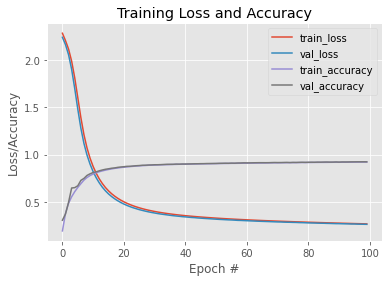

In [9]:
train_mnist()